# Modules

In [25]:
import sys; sys.path.append("../modules")
from nanoword import *

import pprint

# writhe polynomial vs ab polynomials

### nanoword の生成
7交点(classical)の nanoword をランダムに作成。

In [97]:
mnw = Nanoword.generate_random_nanoword(7)
display(mnw.word, mnw.alphabet)

'CACFEDGGEBDFBA'

[(A,b+), (B,b-), (C,b-), (D,a+), (E,a+), (F,b-), (G,a-)]

### Ind vs self-linking
各交点の ind と self-linking を計算し比較。

In [98]:
for ltr in mnw.alphabet:
    print(f"{ltr}  -->  ind: {mnw.ind(ltr):>2}  /  sl: {mnw.self_linking(ltr)}")

print("\n-----\n")
print(f"writhe poly: {mnw.writhe_polynomial()}")
print(f"ab polys:    {mnw.ab_polynomials()}")

A, b+  -->  ind:  1  /  sl: {'R(a)': 0, 'R(b)': -1}
B, b-  -->  ind:  0  /  sl: {'R(a)': 0, 'R(b)': 0}
C, b-  -->  ind:  1  /  sl: {'R(a)': -1, 'R(b)': 0}
D, a+  -->  ind:  2  /  sl: {'R(a)': -2, 'R(b)': 0}
E, a+  -->  ind: -1  /  sl: {'R(a)': 1, 'R(b)': 0}
F, b-  -->  ind:  1  /  sl: {'R(a)': -1, 'R(b)': 0}
G, a-  -->  ind:  0  /  sl: {'R(a)': 0, 'R(b)': 0}

-----

writhe poly: (1)t^2+(-1)t^1+(-1)+(1)t^-1
ab polys:    ['(1)a^-2+(-2)a^-1+(1)a^1', '(1)b^-1']


writhe poly が自明でも、ab polys が自明でないことがある。

In [112]:
Count, data = 0, []
while len(data) < 1 and Count < 1000:
    mnw = Nanoword.generate_random_nanoword(7)
    wp, abps = mnw.writhe_polynomial(), mnw.ab_polynomials()
    if wp == '(0)' and abps != ['',''] and len(abps[0]) > 10:
        data.append(mnw)
    Count += 1
for nw in data: print(f"{nw.word} --> ab polys: {nw.ab_polynomials()}")

CFFDBABDAEGCGE --> ab polys: ['(-1)a^-1+(-1)a^1+(1)a^2', '(1)b^-1+(1)b^1+(-1)b^2']


### ランダムに計算

In [33]:
Count = 0
data = []
while Count < 10:
    nw = Nanoword.generate_random_nanoword(9)
    wp, abps = nw.writhe_polynomial(), nw.ab_polynomials()
    print(f"{nw.word}\n -->   wp: {wp}\n --> abps: {abps}")
    Count += 1

EFBGDICAEDAFBGCHHI
 -->   wp: (4)t^1+(-7)+(2)t^-1+(1)t^-2
 --> abps: ['(3)a^-1+(1)a^1', '(1)b^-1+(1)b^1+(1)b^2']
AGEICBFIHFEGHADDBC
 -->   wp: (1)t^1+(-2)+(1)t^-1
 --> abps: ['', '(1)b^-1+(1)b^1']
GHCBIDFCEFHGBAIEDA
 -->   wp: (-1)+(1)t^-1+(1)t^-2+(-1)t^-3
 --> abps: ['(1)a^1+(1)a^2+(-1)a^3', '']
IIGDHDAEBCBFCEGFAH
 -->   wp: (-1)t^1+(1)+(1)t^-1+(-1)t^-2
 --> abps: ['(1)a^-1+(-1)a^2', '(-2)b^-1+(1)b^1']
GIHECABGIFADFHDECB
 -->   wp: (-1)+(1)t^-2+(1)t^-3+(-1)t^-4+(1)t^-5+(-1)t^-6
 --> abps: ['', '(1)b^2+(1)b^3+(-1)b^4+(1)b^5+(-1)b^6']
BBFHAHCFCEAEIDGDIG
 -->   wp: (-2)t^1+(2)+(1)t^-1+(-1)t^-3
 --> abps: ['(-2)a^-1+(1)a^1', '(-1)b^3']
DHAFFEBBCICIAGHDEG
 -->   wp: (1)t^3+(1)t^2+(-1)t^1+(-3)+(2)t^-2
 --> abps: ['(-1)a^-1', '(1)b^-3+(1)b^-2+(2)b^2']
HBCFAAFDGCGEDBIIHE
 -->   wp: (1)t^1+(-1)+(-1)t^-1+(1)t^-2
 --> abps: ['(-1)a^1', '(1)b^-1+(1)b^2']
EIEGAADHDCIGFCBFHB
 -->   wp: (-1)t^2+(2)t^1+(-2)+(2)t^-1+(-1)t^-2
 --> abps: ['(-1)a^-2+(1)a^1', '(2)b^-1+(1)b^1+(-1)b^2']
EFIDDBGBGCAHCFIAHE
 

# Scratch

In [4]:
LABELS_ab = ['a', 'b']  # the second strand in a crossing is going (a) up and (b) down.
LABELS_pm = ['+', '-']  # the sign of a crossing
LABELS = list(zip(LABELS_ab, LABELS_pm))  # = ['a+', 'a-', 'b+', 'b-']
R = {x: set([Sign(x+'+'), Sign(x+'+').tau()]) for x in LABELS_ab}  # = {'a': set(['a+', 'b-']), 'b': set(['b+', 'a-'])}
print(R)   

{'a': {'b-', 'a+'}, 'b': {'b+', 'a-'}}


In [ ]:
mnw = Nanoword.generate_random_nanoword(5)
mnw_rmi = R.I(mnw, reverse=True)
mnw_rmii = R.II(mnw, reverse=True)
mnw_rmiii = R.III(mnw)
print(mnw, [f"{l}" for l in mnw.alphabet])
#print(mnw, mnw_rmi_inv, mnw_rmii_inv)
#
for ltr in mnw_rmii.alphabet:
    for nw in [mnw, mnw_rmi, mnw_rmii, mnw_rmiii]:
        if nw is not None:
            print(f"{ltr} --self_linking--> {nw.self_linking(ltr)}")
    print("-----")

## n-writhe

In [ ]:
mnw = Nanoword("ABCDACEEBD", [Letter('A','a+'),Letter('B','b-'),Letter('C','b-'),Letter('D','b-'),Letter('E','b+')]) #Nanoword.generate_random_nanoword(4)
print(mnw)

print([f"{l}, {s}" for l,s in mnw.signs_on_word()])

alph_w_ind=[{'letter': ltr, 'ind': mnw.ind(ltr)} for ltr in mnw.alphabet]; print(alph_w_ind)

J = [{'n': ind, 'c': 0} for ind in set([x['ind'] for x in alph_w_ind])]
for elm in J:
    for d in alph_w_ind:
        if d['ind'] == elm['n']:
            elm['c'] += d['letter'].sign.pm
if len([d for d in J if d['n'] == 0]) == 0:
    J.append({'n': 0, 'c': 0})
print(J)

wp = ""
for d in sorted(J, key=lambda x: x['n'], reverse=True):
    if not d['n'] == 0:
        wp += f"+({d['c']})t^{d['n']}"
    else:
        s = sum([d['c'] for d in J if not d['n'] == 0])
        wp += f"+({-s})"
        
print(wp[1:])
print()

In [ ]:
mnw.ab_polynomials()

# Drawing Gauss diagrams

DBAFCEEGDABFCG


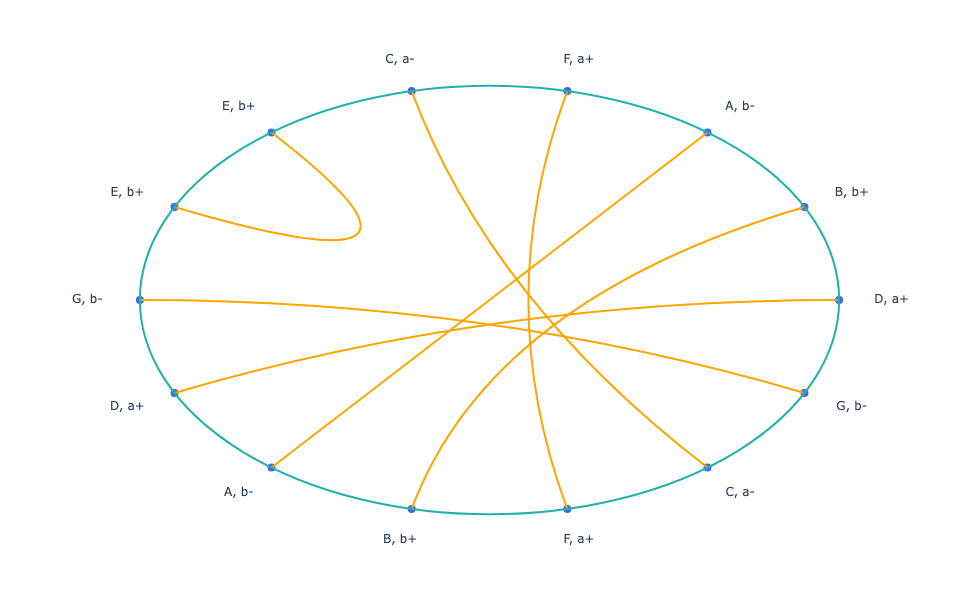

In [226]:
import math
import plotly.graph_objects as go
fig = go.Figure()

nw = Nanoword.generate_random_nanoword(7) #('ABCDBACD', [Letter('A','a+'), Letter('B','b+'), Letter('C','a-'), Letter('D','a-')])  #
s = int(nw.size/2)
#------------b

# Set axes properties
fig.update_xaxes(range=[-0.2, 2.6], zeroline=False)
fig.update_yaxes(range=[-0.2, 2.6])

points_data = []
for i, c in enumerate(nw.word):
    points_data.append({'letter': [l for l in nw.alphabet if l.char == c].pop(), 
                   'coord': (math.cos(i*math.pi/s)+1.2, math.sin(i*math.pi/s)+1.2)})
fig.add_trace(
    go.Scatter(
        x = [p['coord'][0] for p in points_data],
        y = [p['coord'][1] for p in points_data],
        mode="markers", marker=dict(size=8.0, color="RoyalBlue"),
        showlegend=False,
        # text=[p['letter'].char for p in points_data],
    ))
def margin(tup):
    x, y = tup
    return (0.15*(x-1.2), 0.15*(y-1.2))    
fig.add_trace(
    go.Scatter(
        x = [p['coord'][0]+margin(p['coord'])[0] for p in points_data],
        y = [p['coord'][1]+margin(p['coord'])[1] for p in points_data],
        text=[p['letter'] for p in points_data],
        mode="text", showlegend=False,
    ))

paths = []
for ltr in nw.alphabet:
    coords = [p['coord'] for p in points_data if p['letter'] == ltr]
    paths.append(dict(type="path",
                     path="M {},{} Q 1.2,1.2 {},{}".format(
                         coords[0][0],coords[0][1],coords[1][0], coords[1][1]),
                     line_color="orange",))
else: fig.update_layout(shapes=paths)
        
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=0.2, y0=0.2, x1=2.2, y1=2.2,
    line_color="LightSeaGreen",
)

# Set figure size
fig.update_layout(width=600, height=600)

print(nw)
fig.update_layout(plot_bgcolor="white")
fig.update_xaxes(showgrid=False,showticklabels=False)
fig.update_yaxes(showgrid=False,showticklabels=False)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

In [221]:
type(fig)

plotly.graph_objs._figure.Figure

In [145]:
nw = Nanoword('ABCBAC', [Letter('A','a+'), Letter('B','b+'), Letter('C','a-')])  #.generate_random_nanoword(3)
alph = nw.alphabet

alph_posi = [{'ltr': ltr, 'positions': tuple([i for i, x in enumerate(nw.word) if x == ltr.char])}  for ltr in alph] 

s = int(nw.size/2)
points = []
for i, c in enumerate(nw.word):
    points.append({'letter': [l for l in nw.alphabet if l.char == c].pop(), 
                   'coordinate': (math.cos(i*math.pi/s)+1.2, math.sin(i*math.pi/s)+1.2)})
pprint.pprint(points)

[{'coordinate': (2.2, 1.2), 'letter': (A,a+)},
 {'coordinate': (1.7000000000000002, 2.0660254037844386), 'letter': (B,b+)},
 {'coordinate': (0.7000000000000002, 2.0660254037844386), 'letter': (C,a-)},
 {'coordinate': (0.19999999999999996, 1.2000000000000002), 'letter': (B,b+)},
 {'coordinate': (0.6999999999999995, 0.3339745962155616), 'letter': (A,a+)},
 {'coordinate': (1.7, 0.33397459621556136), 'letter': (C,a-)}]


# With Sympy

In [ ]:
from sympy import *
init_printing()

t = symbols('t')

In [ ]:
wp = sum([d['c']*(t**d['n']-1) for d in J])

display(wp)

In [ ]:
random.randint(0,1)